In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"E:\Coursera - Data Analytics\Data\full_data\202004-divvy-tripdata.csv")
data1 = pd.read_csv(r"E:\Coursera - Data Analytics\Data\full_data\202005-divvy-tripdata.csv")
data2 = pd.read_csv(r"E:\Coursera - Data Analytics\Data\full_data\202006-divvy-tripdata.csv")
data3 = pd.read_csv(r"E:\Coursera - Data Analytics\Data\full_data\202007-divvy-tripdata.csv")
data4 = pd.read_csv(r"E:\Coursera - Data Analytics\Data\full_data\202008-divvy-tripdata.csv")
data5 = pd.read_csv(r"E:\Coursera - Data Analytics\Data\full_data\202009-divvy-tripdata.csv")
data6 = pd.read_csv(r"E:\Coursera - Data Analytics\Data\full_data\202010-divvy-tripdata.csv")
data7 = pd.read_csv(r"E:\Coursera - Data Analytics\Data\full_data\202011-divvy-tripdata.csv")
data8 = pd.read_csv(r"E:\Coursera - Data Analytics\Data\full_data\202012-divvy-tripdata.csv")
data9 = pd.read_csv(r"E:\Coursera - Data Analytics\Data\full_data\202101-divvy-tripdata.csv")
data10 = pd.read_csv(r"E:\Coursera - Data Analytics\Data\full_data\202102-divvy-tripdata.csv")
data11 = pd.read_csv(r"E:\Coursera - Data Analytics\Data\full_data\202103-divvy-tripdata.csv")

In [3]:
frame = [data,data1,data2,data3,data4,data5,data6,data7,data8,data9,data10,data11]
data_full = pd.concat(frame)

In [4]:
data_full.shape

(3489748, 13)

In [5]:
data_full.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,A847FADBBC638E45,docked_bike,26-04-20 17:45,26-04-20 18:12,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152.0,41.8964,-87.6610,41.9322,-87.6586,member
1,5405B80E996FF60D,docked_bike,17-04-20 17:08,17-04-20 17:17,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499.0,41.9244,-87.7154,41.9306,-87.7238,member
2,5DD24A79A4E006F4,docked_bike,01-04-20 17:54,01-04-20 18:08,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255.0,41.8945,-87.6179,41.8679,-87.6230,member
3,2A59BBDF5CDBA725,docked_bike,07-04-20 12:50,07-04-20 13:02,California Ave & Division St,216,Wood St & Augusta Blvd,657.0,41.9030,-87.6975,41.8992,-87.6722,member
4,27AD306C119C6158,docked_bike,18-04-20 10:22,18-04-20 11:15,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323.0,41.8902,-87.6262,41.9695,-87.6547,casual


In [6]:
data_full = data_full.dropna()

In [7]:
# to check null values

data_full.isna().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64

In [8]:
data_full.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')

In [9]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3294691 entries, 0 to 228494
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 351.9+ MB


In [10]:
# to change ended_at & started_at to datatime data type

data_full['ended_at'] = pd.to_datetime(data_full['ended_at'])
data_full["started_at"] = pd.to_datetime(data_full["started_at"])

In [11]:
data_full["duration_time"] = (data_full["ended_at"] - data_full["started_at"])/np.timedelta64(1, 'm')

We create a column that will give the day of the week when the ride started.

/!\

0 = Monday

1 = Tuesday

2 = Wednesday

3 = Thursday

4 = Friday

5 = Saturday

6 = Sunday

In [12]:
# extracting day of the week
data_full["day_started"] = data_full["started_at"].dt.dayofweek

In [13]:
# extracting hour of the week
data_full["hour"] = data_full["started_at"].dt.hour

In [14]:
# extracting month
data_full["month_started"] = pd.DatetimeIndex(data_full["started_at"]).month

In [16]:
data_full.describe()

,start_lat,start_lng,end_lat,end_lng,duration_time,day_started,hour,month_started
count,3.294691e+06,3.294691e+06,3.294691e+06,3.294691e+06,3.294691e+06,3.294691e+06,3.294691e+06,3.294691e+06
mean,4.190501e+01,-8.764443e+01,4.190527e+01,-8.764472e+01,2.427226e+01,3.256850e+00,1.431410e+01,7.595032e+00
std,4.161361e-02,2.437207e-02,4.172347e-02,2.450272e-02,1.585146e+03,1.976327e+00,4.587397e+00,2.457346e+00
min,4.164850e+01,-8.777470e+01,4.164850e+01,-8.777470e+01,-3.830320e+05,0.000000e+00,0.000000e+00,1.000000e+00
25%,4.188307e+01,-8.765814e+01,4.188316e+01,-8.765860e+01,8.000000e+00,2.000000e+00,1.100000e+01,6.000000e+00
50%,4.190022e+01,-8.764117e+01,4.190070e+01,-8.764170e+01,1.471667e+01,3.000000e+00,1.500000e+01,8.000000e+00
75%,4.192957e+01,-8.762773e+01,4.193120e+01,-8.762775e+01,2.690000e+01,5.000000e+00,1.800000e+01,9.000000e+00
max,4.206490e+01,-8.752823e+01,4.206501e+01,-8.752823e+01,3.969640e+05,6.000000e+00,2.300000e+01,1.200000e+01


In [17]:
data_full["member_casual"].unique()

array(['member', 'casual'], dtype=object)

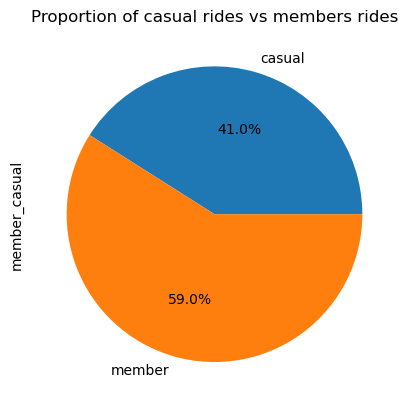

In [18]:
data_full.groupby("member_casual")["member_casual"].count().plot(kind="pie",autopct='%1.1f%%')
plt.title('Proportion of casual rides vs members rides')
plt.show()

In [19]:
data_full["rideable_type"].unique()

array(['docked_bike', 'electric_bike', 'classic_bike'], dtype=object)

In [20]:
member= data_full.groupby(["member_casual","rideable_type"])["rideable_type"].agg(["count"])
member=member.reset_index()
member

,member_casual,rideable_type,count
0,casual,classic_bike,70433
1,casual,docked_bike,1114616
2,casual,electric_bike,166190
3,member,classic_bike,248181
4,member,docked_bike,1439675
5,member,electric_bike,255596


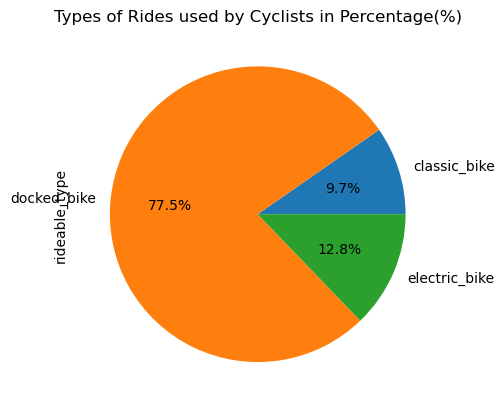

In [21]:
data_full.groupby("rideable_type")["rideable_type"].count().plot(kind = "pie",autopct='%1.1f%%')
plt.title("Types of Rides used by Cyclists in Percentage(%)")
plt.show()

In [22]:
bar = data_full.groupby("month_started")["month_started"].count()
bar

month_started
1      88812
2      49249
3     144379
4      54165
5     207680
6     351111
7     561419
8     619021
9     511871
10    348727
11    234182
12    124075
Name: month_started, dtype: int64

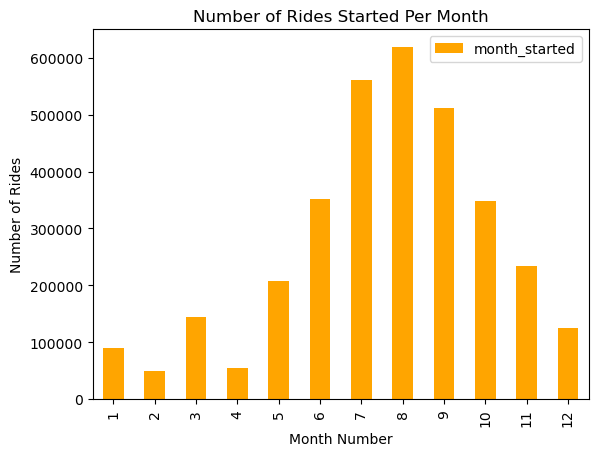

In [23]:
data_full.groupby("month_started")["month_started"].count().plot(kind="bar",color="orange")
plt.legend()
plt.ylabel("Number of Rides")
plt.xlabel("Month Number")
plt.title("Number of Rides Started Per Month")
plt.show()

In [24]:
data_full.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration_time,day_started,hour,month_started
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:00,2020-04-26 18:12:00,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152.0,41.8964,-87.6610,41.9322,-87.6586,member,27.0,6,17,4
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:00,2020-04-17 17:17:00,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499.0,41.9244,-87.7154,41.9306,-87.7238,member,9.0,4,17,4
2,5DD24A79A4E006F4,docked_bike,2020-01-04 17:54:00,2020-01-04 18:08:00,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255.0,41.8945,-87.6179,41.8679,-87.6230,member,14.0,5,17,1
3,2A59BBDF5CDBA725,docked_bike,2020-07-04 12:50:00,2020-07-04 13:02:00,California Ave & Division St,216,Wood St & Augusta Blvd,657.0,41.9030,-87.6975,41.8992,-87.6722,member,12.0,5,12,7
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:00,2020-04-18 11:15:00,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323.0,41.8902,-87.6262,41.9695,-87.6547,casual,53.0,5,10,4


In [25]:
data_full.groupby("day_started")["day_started"].count()

day_started
0    389138
1    400805
2    445252
3    434525
4    491253
5    631889
6    501829
Name: day_started, dtype: int64

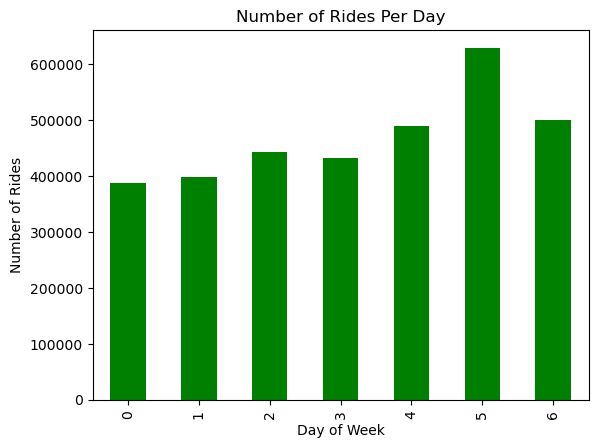

In [60]:
data_full.groupby("day_started")["day_started"].count().plot(kind="bar",color = "green")
plt.xlabel("Day of Week")
plt.ylabel("Number of Rides")
plt.title("Number of Rides Per Day")
plt.show()

In [29]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3294691 entries, 0 to 228494
Data columns (total 17 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
 13  duration_time       float64       
 14  day_started         int64         
 15  hour                int64         
 16  month_started       int64         
dtypes: datetime64[ns](2), float64(5), int64(3), object(7)
memory usage: 452.5+ MB


In [31]:
pivot = data_full.groupby("member_casual")["duration_time"].agg(["mean","max","min"])
pivot

,mean,max,min
member_casual,,,
casual,55.106954,396964.0,0.016667
member,18.591045,352225.0,0.016667


In [30]:
# to eliminate negative values which can be occured due to human error
data_full = data_full[data_full["duration_time"]>0]

In [32]:
summary = data_full.groupby(["member_casual","day_started"])["duration_time"].agg(["mean","max","min"])
summary = summary.reset_index()
summary

,member_casual,day_started,mean,max,min
0,casual,0,49.865037,96069.0,0.016667
1,casual,1,56.705589,175392.0,0.016667
2,casual,2,58.847361,396964.0,0.016667
3,casual,3,58.227895,263295.0,0.016667
4,casual,4,51.813210,70596.0,0.016667
5,casual,5,55.032481,351462.0,0.016667
6,casual,6,55.715709,84693.0,0.016667
7,member,0,16.711541,87837.0,0.016667
8,member,1,17.830145,119676.0,0.016667
9,member,2,19.703806,175652.0,0.016667


summary.info()

Visualize the average length of a trip per day and per member type.¶


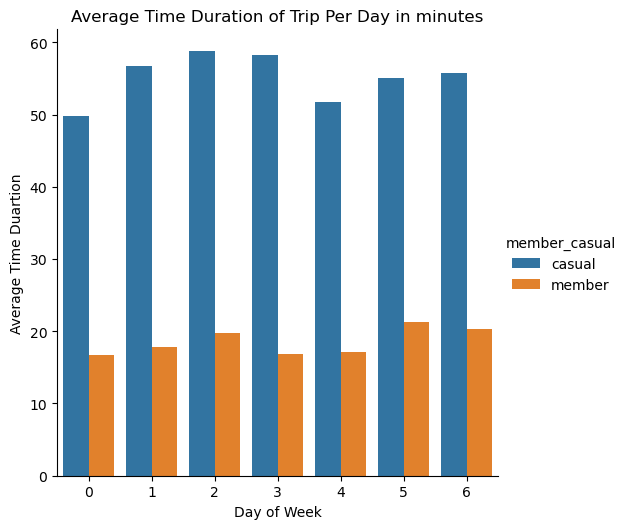

In [33]:
sns.catplot(data=summary,kind = "bar",x="day_started",y="mean",hue="member_casual")
plt.xlabel("Day of Week")
plt.ylabel("Average Time Duartion")
plt.title("Average Time Duration of Trip Per Day in minutes")
plt.show()

In [34]:
ride = data_full.groupby(["rideable_type","member_casual"])["duration_time"].agg(["mean","max","min"])
ride = ride.reset_index()
ride

,rideable_type,member_casual,mean,max,min
0,classic_bike,casual,62.464845,44415.0,0.016667
1,classic_bike,member,22.286407,44555.0,0.016667
2,docked_bike,casual,59.340466,396964.0,0.016667
3,docked_bike,member,18.627014,352225.0,0.016667
4,electric_bike,casual,23.662215,43289.0,0.016667
5,electric_bike,member,14.810210,43547.0,0.016667


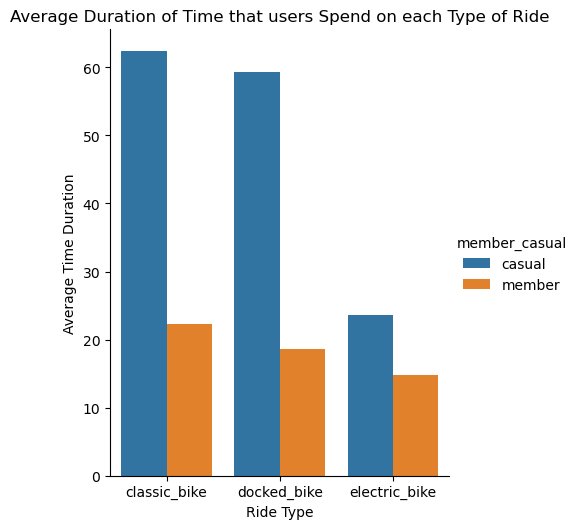

In [35]:
sns.catplot(data=ride,kind = "bar",x="rideable_type",y="mean",hue="member_casual",aspect=0.8)
plt.title("Average Duration of Time that users Spend on each Type of Ride")
plt.xlabel("Ride Type")
plt.ylabel("Average Time Duration")
plt.show()

In [37]:
month = data_full.groupby(["member_casual","month_started"])["duration_time"].agg(["mean","max","min"])
month = month.reset_index()
month

,member_casual,month_started,mean,max,min
0,casual,1,56.696546,86437.000000,0.016667
1,casual,2,115.598234,106953.000000,0.033333
2,casual,3,61.638793,396964.000000,1.000000
3,casual,4,129.289600,351462.000000,1.000000
4,casual,5,57.034333,87712.000000,0.016667
5,casual,6,65.471592,263295.000000,0.016667
6,casual,7,64.775978,177072.000000,0.016667
7,casual,8,49.479562,175392.000000,0.016667
8,casual,9,46.770408,54283.350000,0.016667
9,casual,10,38.908880,44771.000000,0.016667


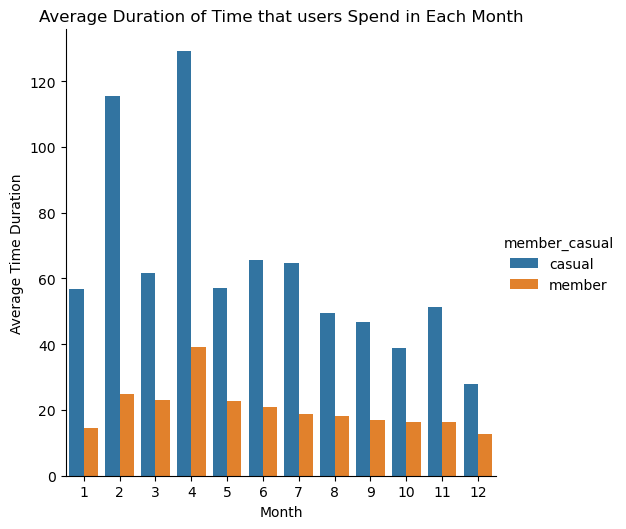

In [61]:
sns.catplot(data = month,kind = "bar",x="month_started",y="mean",hue="member_casual")
plt.ylabel("Average Time Duration")
plt.xlabel("Month")
plt.title("Average Duration of Time that users Spend in Each Month")
plt.show()

In [40]:
day = data_full.groupby(['member_casual','rideable_type'])['rideable_type'].agg(['count'])
day = day.reset_index()
day

,member_casual,rideable_type,count
0,casual,classic_bike,70233
1,casual,docked_bike,1111187
2,casual,electric_bike,166037
3,member,classic_bike,247301
4,member,docked_bike,1431832
5,member,electric_bike,255332


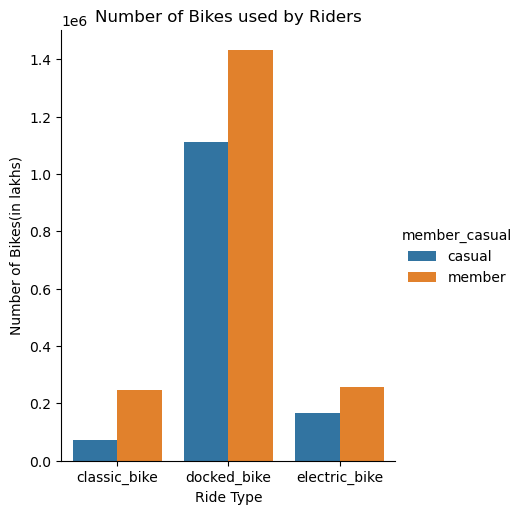

In [66]:
sns.catplot(data = day,kind="bar",x="rideable_type",y="count",hue="member_casual",aspect=0.8)
plt.title("Number of Bikes used by Riders")
plt.ylabel("Number of Bikes(in lakhs)")
plt.xlabel("Ride Type")
plt.show()

In [42]:
count = data_full.groupby(["member_casual","month_started"])["month_started"].agg(["count"])
count = count.reset_index()
count

,member_casual,month_started,count
0,casual,1,15563
1,casual,2,9854
2,casual,3,56134
3,casual,4,14558
4,casual,5,88881
5,casual,6,157244
6,casual,7,272261
7,casual,8,285392
8,casual,9,218530
9,casual,10,124927


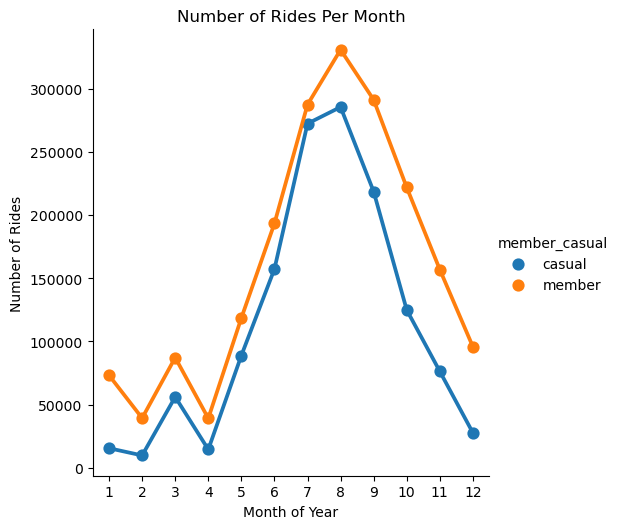

In [70]:
sns.catplot(data = count,kind="point",x="month_started",y="count",hue="member_casual")
plt.xlabel("Month of Year")
plt.ylabel("Number of Rides")
plt.title("Number of Rides Per Month")
plt.show()

In [44]:
week = data_full.groupby(["day_started","member_casual"])["day_started"].agg(["count"])
week = week.reset_index()
week

,day_started,member_casual,count
0,0,casual,140342
1,0,member,247442
2,1,casual,134199
3,1,member,264726
4,2,casual,150511
5,2,member,293095
6,3,casual,155435
7,3,member,277735
8,4,casual,198614
9,4,member,290445


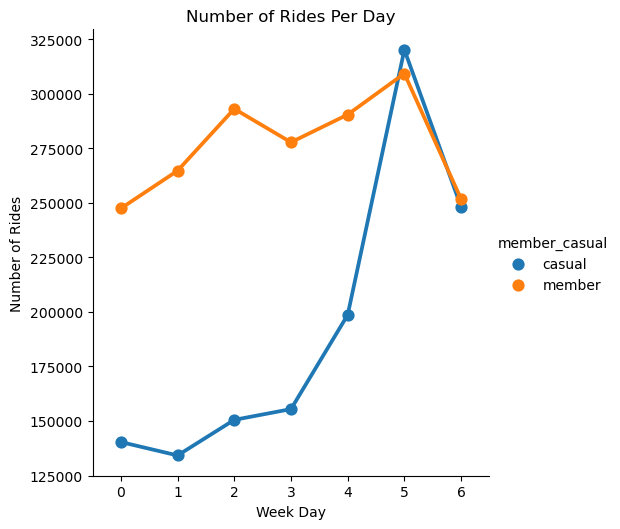

In [72]:
sns.catplot(data = week,kind="point",x="day_started",y="count",hue="member_casual")
plt.title("Number of Rides Per Day")
plt.xlabel("Week Day")
plt.ylabel("Number of Rides")
plt.show()

In [48]:
sum = data_full.groupby(["member_casual"])["duration_time"].agg(["sum","mean"])
sum=sum.reset_index()
sum

,member_casual,sum,mean
0,casual,7.425425e+07,55.106954
1,member,3.596373e+07,18.591045


In [49]:
sum["abs"]=round(sum["sum"])
sum

,member_casual,sum,mean,abs
0,casual,7.425425e+07,55.106954,74254251.0
1,member,3.596373e+07,18.591045,35963727.0


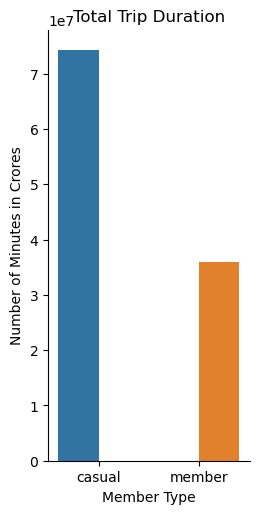

In [50]:
sns.catplot(data = sum,kind="bar",x="member_casual",y="abs",hue="member_casual",aspect=0.5)
plt.ylabel("Number of Minutes in Crores")
plt.xlabel("Member Type")
plt.title("Total Trip Duration")
plt.show()

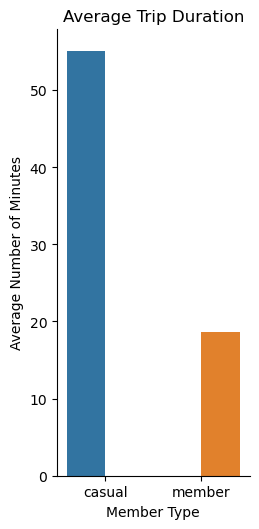

In [51]:
sns.catplot(data = sum,kind="bar",x="member_casual",y="mean",hue="member_casual",aspect=0.5)
plt.ylabel("Average Number of Minutes")
plt.xlabel("Member Type")
plt.title("Average Trip Duration")
plt.show()

In [58]:
hour = data_full.groupby(["member_casual","hour"])["hour"].agg(["count"])
hour = hour.reset_index()
hour

,member_casual,hour,count
0,casual,0,20946
1,casual,1,13024
2,casual,2,7154
3,casual,3,3762
4,casual,4,3064
5,casual,5,4921
6,casual,6,12107
7,casual,7,21751
8,casual,8,29784
9,casual,9,38311


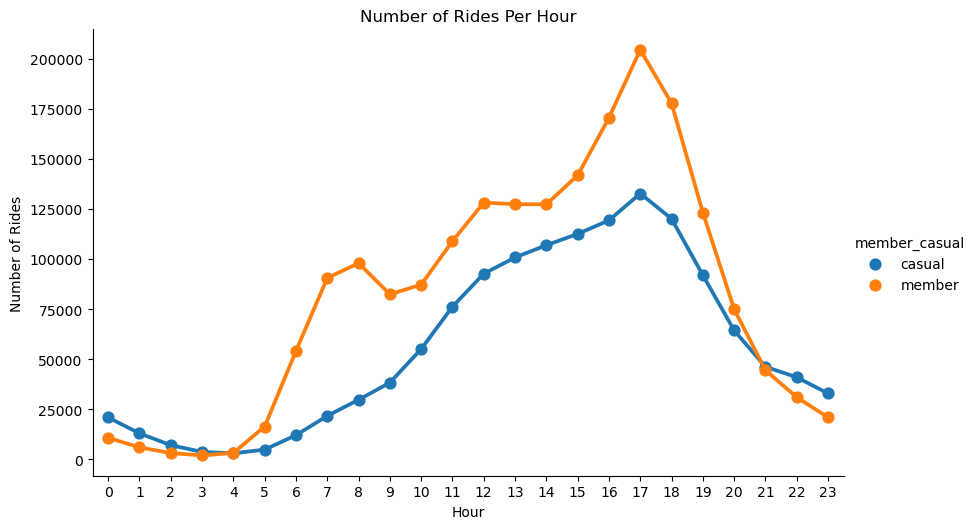

In [59]:
sns.catplot(data = hour,kind = "point",x = "hour",y="count",hue="member_casual",aspect = 1.7)
plt.title("Number of Rides Per Hour")
plt.xlabel("Hour")
plt.ylabel("Number of Rides")
plt.show()